In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive

'Colab Notebooks'


In [2]:
from google.colab import files
files.upload()

Saving audio.zip to audio.zip
Saving metadata.csv to metadata.csv


In [3]:
import pandas as pd

df=pd.read_csv('metadata.csv',sep='|', header=None)

In [ ]:
df.head()

,0,1,2
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       13100 non-null  object
 1   1       13100 non-null  object
 2   2       13084 non-null  object
dtypes: object(3)
memory usage: 307.2+ KB


In [4]:
df.loc[:101][:].to_csv('metadata.csv')

In [ ]:
!cp metadata.csv "drive/My Drive/"

In [5]:
training_data=df.loc[:101][:]

In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       102 non-null    object
 1   1       102 non-null    object
 2   2       102 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [ ]:
training_data.drop()

'For although the Chinese took impressions from wood blocks engraved in relief for centuries before the woodcutters of the Netherlands, by a similar process'

In [7]:
training_data = training_data.drop(2, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [8]:
training_data.head()

,0,1
0,LJ001-0001,"Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...


In [9]:
training_data[0]=training_data[0]+'.wav'

In [10]:
training_data.head()

,0,1
0,LJ001-0001.wav,"Printing, in the only sense with which we are ..."
1,LJ001-0002.wav,in being comparatively modern.
2,LJ001-0003.wav,For although the Chinese took impressions from...
3,LJ001-0004.wav,"produced the block books, which were the immed..."
4,LJ001-0005.wav,the invention of movable metal letters in the ...


In [11]:
from zipfile import ZipFile

with ZipFile('audio.zip', 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [12]:
import librosa

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
import numpy as np
import librosa
import IPython.display as ipd
import librosa.display

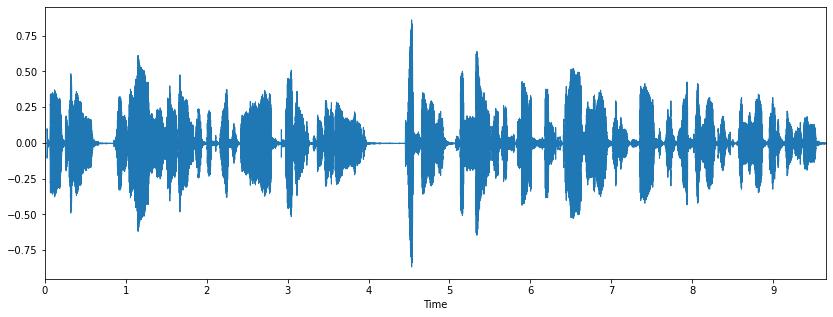

In [14]:
filename='audio/LJ001-0001.wav'
plt.figure(figsize=(14,5))
audio_data,sample_rate=librosa.load(filename)
librosa.display.waveplot(audio_data,sr=sample_rate)
ipd.Audio(filename)

/usr/local/lib/python3.7/dist-packages/librosa/display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


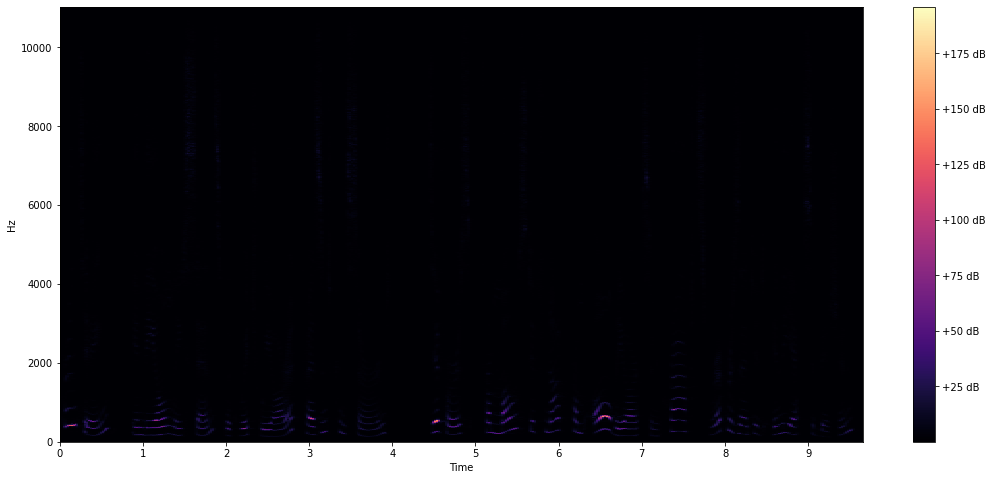

In [19]:
# Plotting Spectogram of a waveform

sgram = librosa.stft(audio_data)
Xdb = librosa.amplitude_to_db(abs(sgram))
plt.figure(figsize=(18, 8))
librosa.display.specshow(sgram, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')

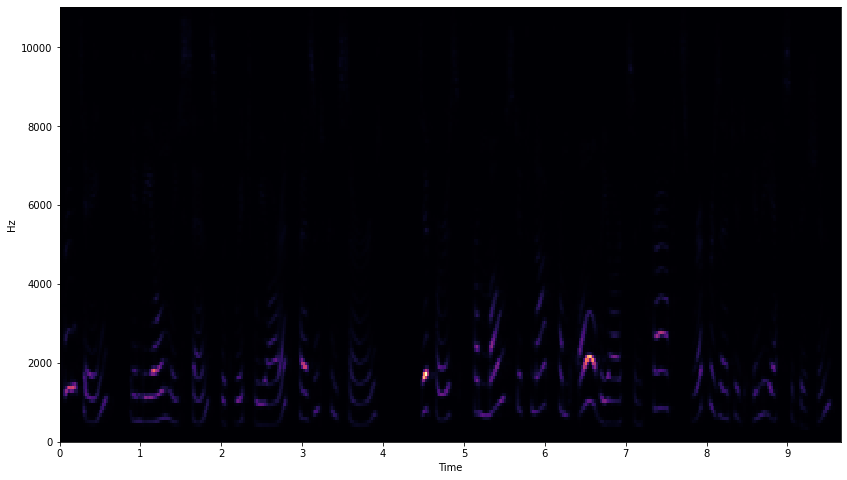

In [16]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram, sr=sample_rate, x_axis='time', y_axis='hz')

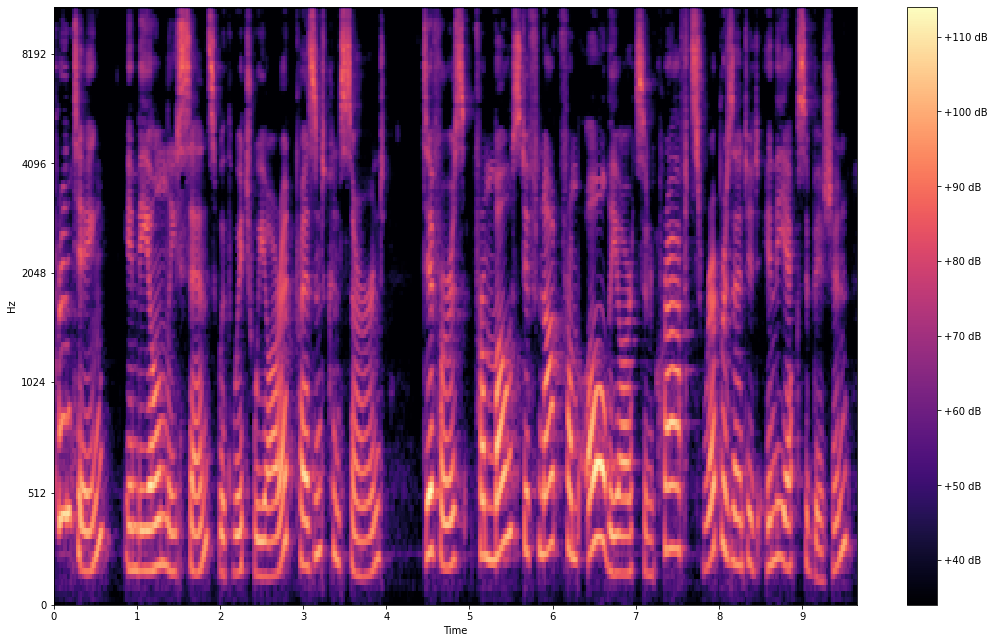

In [22]:
# Applying the DB filter to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)

plt.figure(figsize=(18,11))
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [23]:
print(type(mel_sgram), mel_sgram.shape)

<class 'numpy.ndarray'> (128, 416)


MFCC is of type <class 'numpy.ndarray'> with shape (20, 416)


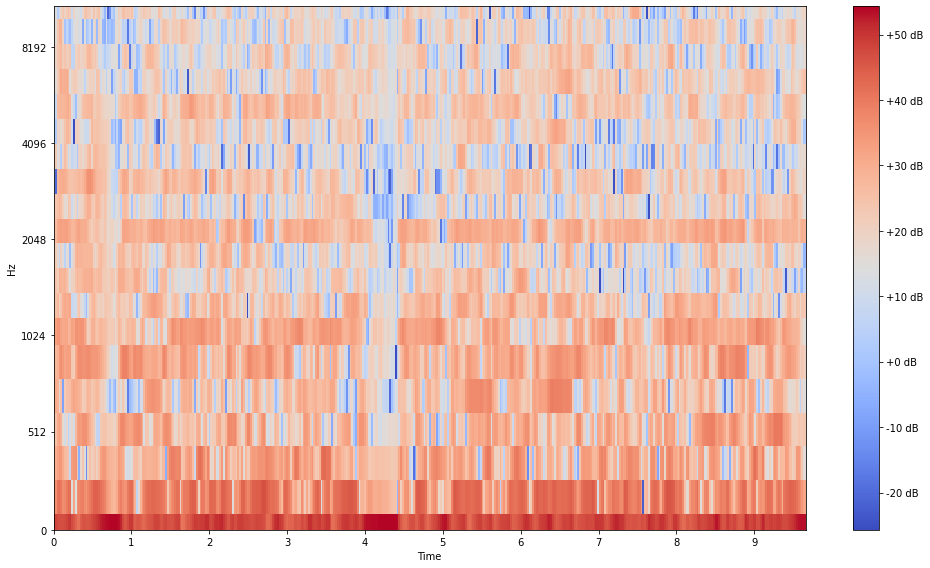

In [28]:
import sklearn

mfcc = librosa.feature.mfcc(audio_data, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
#mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
# Convert to log scale (dB). We'll use the peak power as reference.
log_mfcc = librosa.amplitude_to_db(mfcc)
librosa.display.specshow(log_mfcc, sr=sample_rate, x_axis='time', y_axis='mel')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')

plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()


we had seen that the Mel Spectrogram for this same audio had shape (128, 134), whereas the MFCC has shape (20, 134). The MFCC extracts a much smaller set of features from the audio that are the most relevant in capturing the essential quality of the sound.

Data Augmentation

A common technique to increase the diversity of your dataset, particularly when you don’t have enough data, is to augment your data artificially. We do this by modifying the existing data samples in small ways. 


**Spectrogram Augmentation**

The normal transforms you would use for an image don’t apply to spectrograms. For instance, a horizontal flip or a rotation would substantially alter the spectrogram and the sound that it represents.
Instead, we use a method known as SpecAugment where we block out sections of the spectrogram. There are two flavors:

**Frequency mask** — randomly mask out a range of consecutive frequencies by adding horizontal bars on the spectrogram.
**Time mask** — similar to frequency masks, except that we randomly block out ranges of time from the spectrogram by using vertical bars.

For sounds such as human speech where the order does matter, the gaps can be filled with silence.

In [ ]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13,n_fft=2048, hop_length=512)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [ ]:
import numpy as np
from tqdm import tqdm
import os
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
audio_dataset_path='audio/'
for index_num,row in tqdm(training_data.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row[0]))
    final_class_labels=row[0]
    final_transcription=row[1]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels,final_transcription])

102it [00:02, 34.28it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
train_data=pd.DataFrame(extracted_features,columns=['MFCC_feature','File Name','Transcription'])
train_data.head()

,MFCC_feature,File Name,Transcription
0,"[-266.8429, 71.081, 3.0725653, 10.009679, -20....",LJ001-0001.wav,"Printing, in the only sense with which we are ..."
1,"[-278.20526, 117.87723, -11.421263, 9.987215, ...",LJ001-0002.wav,in being comparatively modern.
2,"[-259.35635, 71.93368, 2.9796815, 4.9307637, -...",LJ001-0003.wav,For although the Chinese took impressions from...
3,"[-288.14447, 68.20433, -0.062113445, 9.287369,...",LJ001-0004.wav,"produced the block books, which were the immed..."
4,"[-282.47372, 77.05421, 7.5512223, 19.465595, -...",LJ001-0005.wav,the invention of movable metal letters in the ...


In [ ]:
X=train_data['MFCC_feature']

In [ ]:
Y=train_data['Transcription']

In [ ]:
# Some data Preprocessing in transcript
# Expanding abbreviations

In [ ]:
X.head()

0    [-266.8429, 71.081, 3.0725653, 10.009679, -20....
1    [-278.20526, 117.87723, -11.421263, 9.987215, ...
2    [-259.35635, 71.93368, 2.9796815, 4.9307637, -...
3    [-288.14447, 68.20433, -0.062113445, 9.287369,...
4    [-282.47372, 77.05421, 7.5512223, 19.465595, -...
Name: MFCC_feature, dtype: object

In [ ]:
X.shape

(102,)

In [ ]:
# Encoding output variable

class TextTransform:
    """Maps characters to integers and vice versa"""
    def __init__(self):
        char_map_str = """
        ' 46
        <SPACE> 1
        a 2
        b 3
        c 4
        d 5
        e 6
        f 7
        g 8
        h 9
        i 10
        j 11
        k 12
        l 13
        m 14
        n 15
        o 16
        p 17
        q 18
        r 19
        s 20
        t 21
        u 22
        v 23
        w 24
        x 25
        y 26
        z 27
        . 28
        , 29
        " 30
        - 31
        1 32
        2 33
        3 34
        4 35
        5 36
        6 37
        7 38
        8 39
        9 40
        0 41
        ; 42
        ( 43
        ) 44
        : 45
        """
        self.char_map = {}
        self.index_map = {}
        for line in char_map_str.strip().split('\n'):
            ch, index = line.split()
            self.char_map[ch] = int(index)
            self.index_map[int(index)] = ch
        self.index_map[1] = ' '

    def text_to_int(self, text):
        """ Use a character map and convert text to an integer sequence """
        int_sequence = []
        for c in text:
            if c == ' ':
                ch = self.char_map['<SPACE>']
            else:
                ch = self.char_map[c]
            int_sequence.append(ch)
        return int_sequence

    def int_to_text(self, labels):
        """ Use a character map and convert integer labels to an text sequence """
        string = []
        for i in labels:
            string.append(self.index_map[i])
        return ''.join(string).replace('<SPACE>', ' ')

In [ ]:
Y.head()

0    [17, 19, 10, 15, 21, 10, 15, 8, 29, 1, 10, 15,...
1    [10, 15, 1, 3, 6, 10, 15, 8, 1, 4, 16, 14, 17,...
2    [7, 16, 19, 1, 2, 13, 21, 9, 16, 22, 8, 9, 1, ...
3    [17, 19, 16, 5, 22, 4, 6, 5, 1, 21, 9, 6, 1, 3...
4    [21, 9, 6, 1, 10, 15, 23, 6, 15, 21, 10, 16, 1...
Name: Transcription, dtype: object

In [ ]:


text_transform = TextTransform()

for i,sentence in enumerate(Y):
  Y[i]=np.array(text_transform.text_to_int(str.lower(sentence)))

TypeError: ignored

In [ ]:
Y.head()

0    [17, 19, 10, 15, 21, 10, 15, 8, 29, 1, 10, 15,...
1    [10, 15, 1, 3, 6, 10, 15, 8, 1, 4, 16, 14, 17,...
2    [7, 16, 19, 1, 2, 13, 21, 9, 16, 22, 8, 9, 1, ...
3    [17, 19, 16, 5, 22, 4, 6, 5, 1, 21, 9, 6, 1, 3...
4    [21, 9, 6, 1, 10, 15, 23, 6, 15, 21, 10, 16, 1...
Name: Transcription, dtype: object

In [ ]:
m = max(map(len, Y))

In [ ]:
m # max length of sequence

168

In [ ]:
Y=np.array([np.pad(v, (0, m - len(v)), 'constant') for v in Y])

In [ ]:
X=np.array(X.tolist(),dtype=np.float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
def show_shapes(): # can make yours to take inputs; this'll use local variable values
    print("Expected: (num_samples, timesteps, channels)")
    print("Sequences: {}".format(X.shape))
    print("Targets:   {}".format(y.shape))

In [ ]:
X = np.asarray(X)
y = np.asarray(Y)
show_shapes()

Expected: (num_samples, timesteps, channels)
Sequences: (102, 13)
Targets:   (102, 168)


In [ ]:

y = np.expand_dims(y, -1)
show_shapes()

Expected: (num_samples, timesteps, channels)
Sequences: (102, 13)
Targets:   (102, 168, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1)

In [ ]:
X_train.shape

(81, 13)

In [ ]:
X_train = X_train[np.newaxis,...] 
X_test = X_test[np.newaxis,...]
X_validation = X_validation[np.newaxis,...]

In [ ]:
def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """
    h = array.shape[0]
    w = array.shape[1]
    a = max((xx - h) // 2,0)
    aa = max(0,xx - a - h)
    b = max(0,(yy - w) // 2)
    bb = max(yy - b - w,0)
    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
y_train = y_train.reshape(1,-1)
y_test=y_test.reshape(1,-1)
y_validation=y_validation.reshape(1,-1)

In [ ]:
import tensorflow as tf

def build_model(input_shape, loss="sparse_categorical_crossentropy", learning_rate=0.0001):
    """Build neural network using keras.
    :param input_shape (tuple): Shape of array representing a sample train. E.g.: (44, 13, 1)
    :param loss (str): Loss function to use
    :param learning_rate (float):
    :return model: TensorFlow model
    """

    # build network architecture using convolutional layers
    model = tf.keras.models.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 3rd conv layer
    model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

    # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    tf.keras.layers.Dropout(0.3)

    # softmax output layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    optimiser = tf.optimizers.Adam(learning_rate=learning_rate)

    # compile model
    model.compile(optimizer=optimiser,
                  loss=loss,
                  metrics=["accuracy"])

    # print model parameters on console
    model.summary()

    return model


def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation):
    """Trains model
    :param epochs (int): Num training epochs
    :param batch_size (int): Samples per batch
    :param patience (int): Num epochs to wait before early stop, if there isn't an improvement on accuracy
    :param X_train (ndarray): Inputs for the train set
    :param y_train (ndarray): Targets for the train set
    :param X_validation (ndarray): Inputs for the validation set
    :param y_validation (ndarray): Targets for the validation set
    :return history: Training history
    """
   
    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, patience=patience)

    # train model
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation),
                        callbacks=[earlystop_callback])
    return history



In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()


In [ ]:
# Model Parameters
EPOCHS = 40
BATCH_SIZE = 32
PATIENCE = 5
LEARNING_RATE = 0.0001
model = build_model(input_shape, learning_rate=LEARNING_RATE)

    # train network
history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)

# plot accuracy/loss for training/validation set as a function of the epochs
plot_history(history)

# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 79, 11, 64)        640       
                                                                 
 batch_normalization_63 (Bat  (None, 79, 11, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 40, 6, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 38, 4, 32)         18464     
                                                                 
 batch_normalization_64 (Bat  (None, 38, 4, 32)        128       
 chNormalization)                                                
                                                     

InvalidArgumentError: ignored